In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 3.2
N= 100  : pi= 3.24
N= 1000  : pi= 3.092
N= 10000  : pi= 3.1336
N= 100000  : pi= 3.13616
N= 1000000  : pi= 3.141664


N= 10000000  : pi= 3.1418976


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

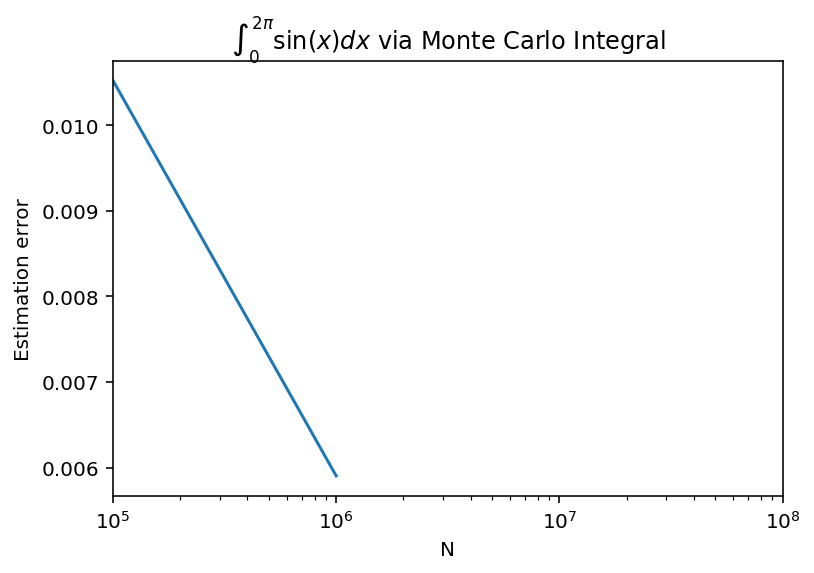

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGRzW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAWwZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcGDHx3NJRQqy1T0E5TNzEbpML0Pczu3A36h0K
wr1bMEO8jFplGmE8LpDVt9BuI6xd1HDYUop4uU+L9yNzhYrZsSK8yJ+LMQ8L9cF8OKC0aE+9e9uR
5AvemSnYgwyRPNP1tm9KOnet3VqRQ59jLUm746j7+uFPBT50U6TDbFrd2LLBCqN4TufWy/k7sd2k
ZouWLCNKzYAxSJQwszwuPkDziMYig+fvkxnByWtz64X+IXdaVfbf3e3DgSK+Ljqw656a7Qg/bWH3
/LFlusdQxqfFb1RROe8mtdJbyYWAymSXr6gRH5vRKdUsziielkQAuUh3tvo7Od7aWNLKU8CxpErx
y+1EFmyGWHT2y564D7QOM+3+jz66AGipqsbGaWWOivNwmIvFy85T9h5tSTxfnfIt8bkVcCMAF1AA
SwVBkjy6bjZ75L6CDR+2bq/+6iIIybVDh5eLWsYi8efMLvSNWZPAdELjWeAKe7z1SsrzVmeztfJs
Iuh4Q6KjkrbwfDVUsiPcl/un7XN5ulPXDX8yOMx9XuC5OAbr5aX1rMfWAj4mXrlouBP3Q8QsjSv8
FDRxjXCDBozUy1zpe8UXnhDBiJWsUvEZ092uhpPPBCQ8lj+q+1ZGMy4ea3eC6KMhEGlSk26WYfp1
SUzc82GQ3p2xGbKjjsmdDgBg8UY+sNqnV8PIfUxTY/JS8CgesUBr6IMadUpxhH8J1w++MrQKljk8
Cq+qJDNuHzhfk+MWG4zOi8SC9TQObuxWtFI9Rqkjlfuy1OCHsl47Fxqz9PSxTsz4Yt7sbPXb98Co
4i8LqqHjytqC+XJOWwKkce6WbE+tK+Eb5MqgzmbEpe/vPXVIRUzUj57laPGxJ5oHNMjD7nUb7hBW
9Ots5WTyiznetEj4PXUMXAt4oRTbtNOckRB2ZnSn/q3bpOTaR6Ypbrj2NI5T/MOjSdj7KBXU0Db3
nfNIHRz7CwiszfX1OtB8f1i0EebQEKp4J8KFiGLmBAB8w6A1ay9b1MaXhAgj0gdowZ7Cb9HehaD1
VjhVEgwDUSDSPWDF7ZzWl31iuGJ8yLjVOXt9j/OaN5nAFOlNrm+ZD8gycwKbd/tT6VioKg49Q7u8
VAdoMwi0+cdJ1uExUGmQER23VZ17lLfrKaj+27wB4UppaRW+gdmw0bF1F9MS1nQm7aQvJMSiJabn
PCPITB8ZYX5aArogAeJoXf69KL/3yM+bTZkxwSi4bSLy1NUK5fP0Uik0XT52PcBTp63IHHBPc2Lo
zT0ksX1wbJZPar4cL6GH0E/rhfUd4M89jOeVADrIVZv7pcwEFiGOvHUKnzTWBkpQFZZf3xe1kVsG
VyrSPC4c8iEXuYpX3oeREAmnvygptz4lPMLeRaOGUCjulK/wTWTaAVCNl+oOTiYefL/fS4uO8loW
0s5XdRqNX+KMWM95TG98GgqsgDaq/QagJvNxQQAAAVJBmiRsQz/+nhBnbHc6ZXpeqsIFoBMMpq3z
Ckr8+138pSepc+2KV3HHdNE4GU9praz9mphSMoPmkXlUTveHgv7J0/VmIaqZ03aL59tUy8WunGfr
y8M5K8ZjuDT+6PlNA55lTOTITw6GEOZu86s41ZnM0RAq9JTjyefKQOe8Hwqvx6MGINV30GWw3ywO
if2qpw4Au74hdOwYZ7VjEwpTmllVEiupwh97LDWEzeMP47EJSecPySSqwjjWPHSsUVroS05ApICx
+Q0zBeicyduOWU+xzGARjsFrjPF8SvcJtyNjMwXVjBgvemZyoteGLBsF/xiRDyZ1eIwKo+DbB5Vd
Xds7p3v3FZWei0LVpEEt80JRdTn/mJbKoM8nTyeJN6fnrMR3Spf9Edcb7/Y/ltyS/igmUANqE83e
SFT4QJB7Kn+UljNzpfkLIhmdjwCQfO/HWvzb2AAAAJJBnkJ4hH8EfdddaltupEr5C1h4vgvM2DGY
cUisDTpYBG9qHc8wycg88wf60m8xmx72IFTrqlUBktTBslrY55U9z4AQ+OwZ6SGTMMYnQfxOhRzf
plbbIrq9n/nogywMWbtkQjONj6PE5TjvcKk+IJvKJaDjj5FBMZWR0xYvZgy3zDjwS2pvtfDjmGbV
DVESaRg7YQAAAEgBnmF0R/8H68xB5FovL/sAAAMAAG0SdqmWD0yzoSa9WdM6ACZ06XTjsD3lHkLe
CX1Gz+3phLb0tZZxxTL6QZwQkezl1NEWsxYAAABnAZ5jakf/B+27qsCv60N6bCQAAAMAUQlMsIHo
7q+DQsEBAAJ1NHUUZw68DKS/pfBY7C+LFQ/aTtm7ycbT+y5LmpiYPjGrjw9T7OchV1Z0X2ZlPnmD
JkJVG29KQ1D1bjCYoNAWsAACgQAAAP1BmmhJqEFomUwIZ//+nhB/4sc8wwfKE0y0yEBZJ5zgAAJf
jaLSPpZtdS6sx/TEFMsBS

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g2 = rw.new_walk_gen(walkers=100)

In [9]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=200)

NameError: name 'moves' is not defined